## What is Regression?
Linear Regression and Polynomial Regression are supervised regression algorithms. Regression models are used to we predict numerical values instead of categories or classes.

Regression models finds relationships between:
-  one or more independent variables, or explanatory variables,
-  and a target variable or dependent variable.

## Types of Regression
- Linear Regression
  - Simple Linear Regression (2D)
  - Multiple Linear Regression (3D or more)
- Polynomial Regression
  - Simple Polynomial Regression (2D)
  - Multiple Polynomial Regression (3D or more)

![regression types](./assets/regression-types.png)

## The Goal of Regression

given the following dataset. if we want to determine the income of a person based on their education and seniority. We can use a regression model that learns from historical data to create a model that describes the relationship between the education and seniority of a person and their income. and use that model to make estimations.

In [252]:
# import csv file
import pandas as pd

income_df = pd.read_csv('data/income2.csv')
income_df.head(6)

,Education,Seniority,Income
0,21.586207,113.103448,99.917173
1,18.275862,119.310345,92.579135
2,12.068966,100.689655,34.678727
3,17.034483,187.586207,78.702806
4,19.931034,20.000000,68.009922
5,18.275862,26.206897,71.504485


a quick EDA, can show a strong positive correlation between years of education and income (0.9), and a less-strong positive correlation between seniority level and income (0.52).

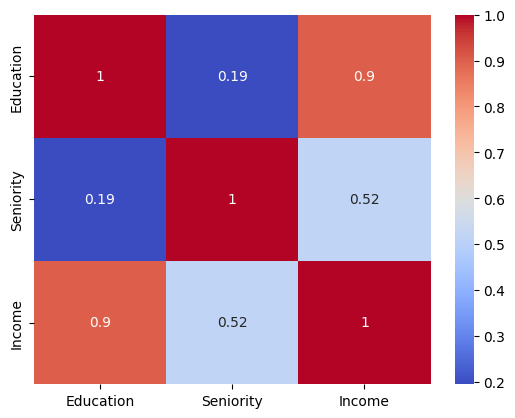

In [253]:
# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

income_corr = income_df.corr()
sns.heatmap(income_corr, annot=True, cmap='coolwarm')
plt.show()

Correlation however doesn't tell us what type of relationship it is, and if it's linear or not.
Also, while the correlation between seniority and income may be less strong, it can be strong when used in combination with years of education. One of the tasks Feature Engineering help us with.

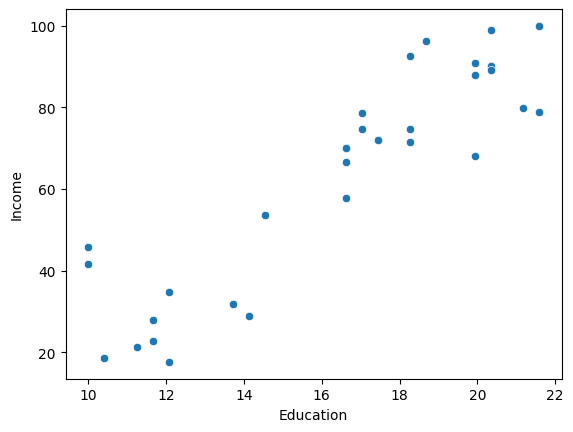

In [254]:
# Visualize a scatter plot between income and education
sns.scatterplot(x='Education', y='Income', data=income_df)
plt.show()

Visualizing the data using a scatter plot, shows us that there is a linear relationship between years of education and income.

Let's include, seniority level in the mix.

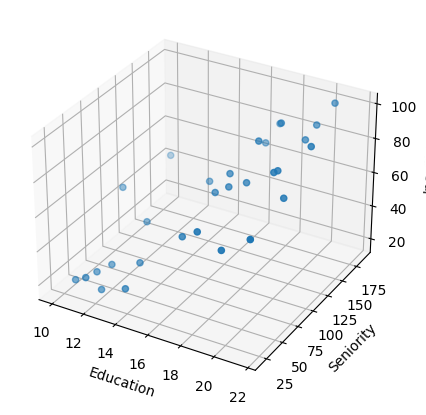

In [255]:
# visualize a 3d scatter plot between Education, Seniority, and Income using mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(income_df['Education'], income_df['Seniority'], income_df['Income'])
ax.set_xlabel('Education')
ax.set_ylabel('Seniority')
ax.set_zlabel('Income')
plt.show()

a static 3d scatter plot is kind of hard to read, let's create an interactive one using plotly.

In [256]:
# visualize a 3d scatter plot between Education, Seniority, and Income using plotly
import plotly.express as px


fig = px.scatter_3d(income_df, x='Education', y='Seniority', z='Income')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


> I couldn't find a way to make the plot interactive in the course note, so here's a gif
> 
![3d scatter plot](assets/3d-income.gif)

we can see a surface model that can cut through the data points. which suggest that we can build a multiple linear regression model here.

The goal of Regression Models is to find that line (for simple linear regression) or surface (for multiple linear regression) that best fits the data.


## Model and Notations
Whenever you learn about a new machine learning algorithm, you should learn about the model and the notations used to describe it.

Generally, the data notations are described as follows:

- Every dataset we work with has a number (m) of (records, observations, signals, instances, data point), these are all synonyms.
- Each of those observations ia a vector of (features, independent variables, explanatory variables, predictors, dimensions, attributes) (x) and a for labelled data, or data we use in supervised learning we also have a target (y). These are also called targets, dependent variables, or a responses, classes, or a categories.
- the number of features is (n). 

so for this dataset, we can say that:
- we have 30 records, m = 30
- we have 2 features, n = 2
- features are years of education, and seniority level
- target is income

The simple linear regression model is the same as the line equation:

$$y = mx + b$$

where:
- m: slope
- c: y-intercept or the bias term, or the value of y when x = 0

but since we have different notation for what (m) is, we represent the simple linear regression model as:

$$\hat{y} = h(x) = \theta_{0} + \theta_{1}x$$

where:
- $\hat{y}$: the predicted value, also called the hypothesis function $h(x)$
- $\theta_{0}$: the bias term, or the y-intercept
- $\theta_{1}$: the slope of the line


Let's plot a few lines to remember the equation.

In [257]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 11)

# a funciton that takes a string equation describing a line and color parameter and plots the line
def plot_line(y, color):
  y_ = eval(y)
  plt.plot(x, y_, label=f'y={y}', marker='o', markersize=5, color=color)
  plt.legend(loc='best')
  plt.xlabel('x')
  plt.ylabel('y')

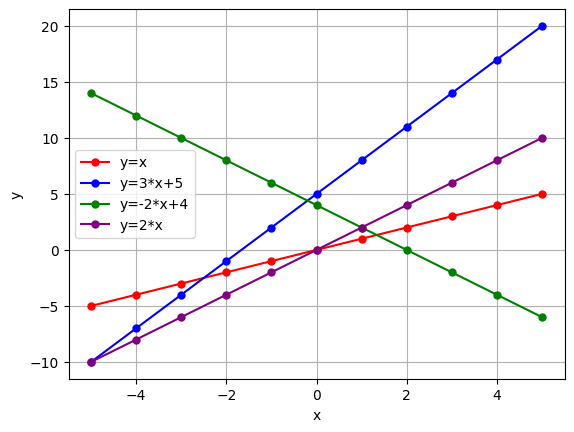

In [258]:
# Calling the plot line function with different parameters
plot_line(y='x', color='red')
plot_line(y='3*x+5', color='blue')
plot_line(y='-2*x+4', color='green')
plot_line(y='2*x', color='purple')

plt.grid()
plt.show()

Simple Linear Regression Model: 
$$\hat{y} = h(x) = \theta_{0} + \theta_{1}x$$

where:
- $\hat{y}$: the predicted value, also called the hypothesis function $h(x)$
- $\theta_{0}$: the bias term, or the y-intercept
- $\theta_{1}$: the slope of the line

it's as if the $\theta_{0}$ was multiplied by $x^{0} = 1$

if we had an extra feature/dimension (n=2), the equation would be generalized to represent a plane or a surface as:

$$\hat{y} = h(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2}$$

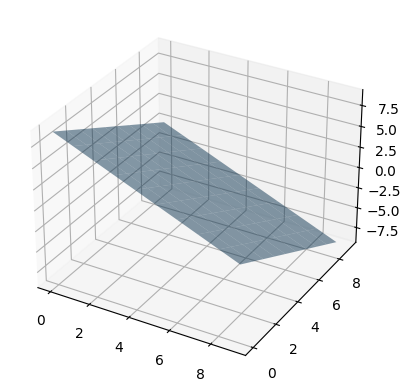

In [259]:
fig = plt.figure()

ax = fig.add_subplot(111,projection='3d')

x1, x2 = np.meshgrid(range(10), range(10))

y_hat = (9 - x1 - x2)

ax.plot_surface(x1, x2, y_hat, alpha=0.5)

plt.show()

if we had n features/dimensions, the equation would be generalized to represent a hyperplane or a hypersurface as:

$$\hat{y} = h(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}$$

or the vectorized form of this would be:

$$\hat{y} = h(x) = \Theta^{T}X$$

where:
- $X$: the matrix of features, or the matrix of independent variables
- $\Theta$: the vector of parameters, or the vector of coefficients, the values we're adjusting to fit the model.
- $\hat{y}$: the predicted value, also called the hypothesis function $h(x)$

Vectorized forms are a way to represent the same equation in a more compact way. Many mathematical libraries are more optimized to work with vectorized forms.

so how do we get the best values for $\Theta$? how do we call one model better than another? how do we know if our model is good or not?

We use Performance Measures/Cost Functions/Lost Functions to evaluate our model.

## Cost Function
In simple linear regression, we aim to get a a line that can represent the data we have as best as possible.

If you had the following lines, which one would you choose? and why?

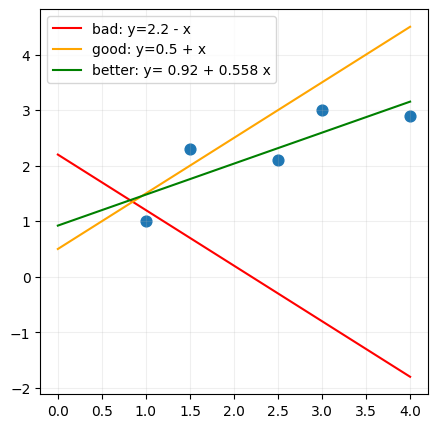

In [260]:
# a pandas dataframe with 2 columns: x and y
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = [1, 1.5, 2.5, 3, 4]
y = [1, 2.3, 2.1, 3, 2.9]

df = pd.DataFrame({'x': x, 'y': y})
# plot the data

# Scatter plot of the dots
f, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['x'], df['y'], s=60)

# Plot an arbitrary line
x = np.linspace(0, 4, 11)
y_bad = 2.2+ -x
y_good = x + 0.5
y_better = 0.55789474*x + 0.92105263
ax.plot(x,y_bad, label=f'bad: y=2.2 - x', color='red')
ax.plot(x,y_good, label=f'good: y=0.5 + x', color='orange')
ax.plot(x,y_better, label=f'better: y= 0.92 + 0.558 x', color='green')
ax.legend(loc='best')

ax.grid(alpha=0.2)
plt.show()

- We can't choose a line based on how it looks, we need to use a performance measure to evaluate the model.
- We can't use arbitrary points to draw a line using the slope: $y = \frac{y_{2} - y_{1}}{x_{2} - x_{1}}x + b$

One of the common performance measures is mean of the squared errors or the squared residuals $MSE$. 

_How?_ we take the difference between the actual value and the predicted value, and we square it. and we do that for every data point, and we get the mean of all those values.

$$MSE = \frac{1}{m}\sum_{i=1}^{m}(y_{i} - \hat{y_{i}})^{2}$$

We want to find the $\hat{y}$ that gets us the lowers $MSE$.

Here's an explanation of calculating the $MSE$ for a simple linear regression model. (we won't be doing this manually)

In [261]:
import pandas as pd

df = pd.DataFrame([[1, 1], [1.5, 2.3], [2.5, 2.1], [3, 3], [4, 2.9]], columns=['x', 'y'])
df

,x,y
0,1.0,1.0
1,1.5,2.3
2,2.5,2.1
3,3.0,3.0
4,4.0,2.9


we'll just start with a random line, any line, 

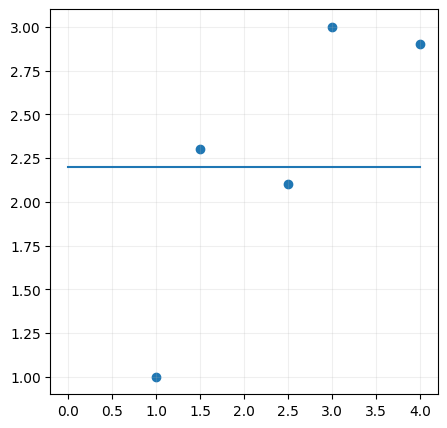

In [262]:
# plot the data
import matplotlib.pyplot as plt

# Scatter plot of the dots
f, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['x'], df['y'])

# Plot an arbitrary line
x = np.linspace(0, 4, 11)
y = 0*x + 2.2
ax.plot(x,y, label=f'y=2.25')

ax.grid(alpha=0.2)
plt.show()

and then calculate the distance between the line and the data points.

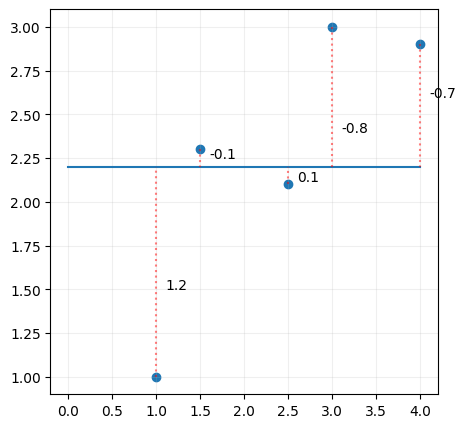

In [263]:
# plot the data
import matplotlib.pyplot as plt

# Scatter plot of the dots
f, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['x'], df['y'])

# Plot an arbitrary line
x = np.linspace(0, 4, 11)
y = 0*x + 2.2
ax.plot(x,y, label=f'y=2.25')

# Residuals
ax.plot([1,1],[1, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.1, 1.5, '1.2')
ax.plot([1.5,1.5],[2.3, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.6, 2.25, '-0.1')
ax.plot([2.5,2.5],[2.1, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(2.6, 2.12, '0.1')
ax.plot([3,3],[3, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(3.1, 2.4, '-0.8')
ax.plot([4,4],[2.9, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(4.1, 2.6, '-0.7')

ax.grid(alpha=0.2)
plt.show()

Some of the values are negative, summing the errors may lead to them cancelling each other out, so we square the distance, and we sum all the squared distances, 

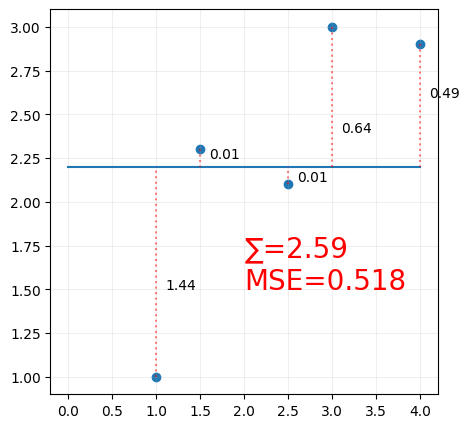

In [264]:
# plot the data
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['x'], df['y'])

x = np.linspace(0, 4, 5)
y = 0*x + 2.2
y_ = 0*df['x'] + 2.2

residuals = (y_ - df['y'])**2
SE = np.sum(residuals)
MSE = np.mean(residuals)

ax.plot(x,y, label=f'y=2.25')

ax.plot([1,1],[1, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.1, 1.5, '1.44')
ax.plot([1.5,1.5],[2.3, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.6, 2.25, '0.01')
ax.plot([2.5,2.5],[2.1, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(2.6, 2.12, '0.01')
ax.plot([3,3],[3, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(3.1, 2.4, '0.64')
ax.plot([4,4],[2.9, 2.2], color='red', linestyle='dotted', alpha=0.5)
ax.text(4.1, 2.6, '0.49')

ax.text(2, 1.5, f'∑={SE}\nMSE={MSE}', fontsize=20, color='red')

ax.grid(alpha=0.2)
plt.show()

$$MSE = \frac{1}{m}\sum_{i=1}^{m}(y_{i} - \hat{y_{i}})^{2}$$
We call this the loss function, or the cost function. and we want to minimize this function.

Rinse and Repeat until we get the best line.

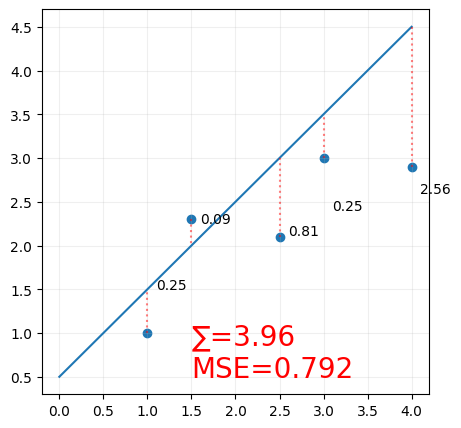

In [265]:
# plot the data
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['x'], df['y'])

x = np.linspace(0, 4, 5)
y = x + 0.5
y_ = df['x'] + 0.5

residuals = (y_ - df['y'])**2
SE = np.sum(residuals)
MSE = np.mean(residuals)

ax.plot(x,y, label=f'y=0.5 + x')

ax.plot([1,1],[1, 1.5], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.1, 1.5, '0.25')
ax.plot([1.5,1.5],[2.3, 2], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.6, 2.25, '0.09')
ax.plot([2.5,2.5],[2.1, 3], color='red', linestyle='dotted', alpha=0.5)
ax.text(2.6, 2.12, '0.81')
ax.plot([3,3],[3, 3.5], color='red', linestyle='dotted', alpha=0.5)
ax.text(3.1, 2.4, '0.25')
ax.plot([4,4],[2.9, 4.5], color='red', linestyle='dotted', alpha=0.5)
ax.text(4.1, 2.6, '2.56')

ax.text(1.5, .5, f'∑={SE}\nMSE={MSE}', fontsize=20, color='red')

ax.grid(alpha=0.2)
plt.show()

and again

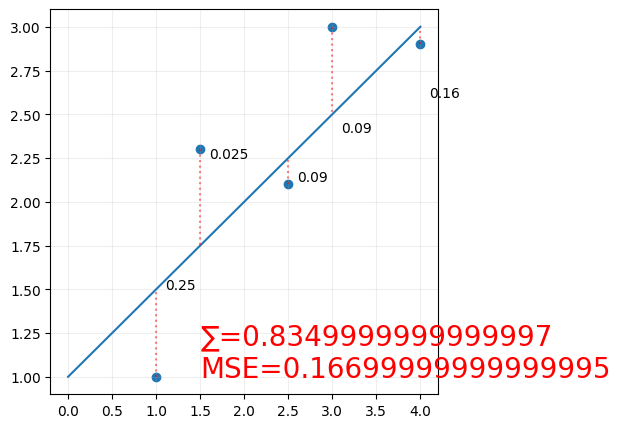

In [266]:
# plot the data
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['x'], df['y'])

x = np.linspace(0, 4, 5)
y = 0.5*x + 1
y_ = 0.5*df['x'] + 1

residuals = (y_ - df['y'])**2
SE = np.sum(residuals)
MSE = np.mean(residuals)

ax.plot(x,y, label=f'y= 0.5x + 1')

ax.plot([1,1],[1, 1.5], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.1, 1.5, '0.25')
ax.plot([1.5,1.5],[2.3, 1.75], color='red', linestyle='dotted', alpha=0.5)
ax.text(1.6, 2.25, '0.025')
ax.plot([2.5,2.5],[2.1, 2.25], color='red', linestyle='dotted', alpha=0.5)
ax.text(2.6, 2.12, '0.09')
ax.plot([3,3],[3, 2.5], color='red', linestyle='dotted', alpha=0.5)
ax.text(3.1, 2.4, '0.09')
ax.plot([4,4],[2.9, 3], color='red', linestyle='dotted', alpha=0.5)
ax.text(4.1, 2.6, '0.16')

ax.text(1.5, 1, f'∑={SE}\nMSE={MSE}', fontsize=20, color='red')

ax.grid(alpha=0.2)
plt.show()

For simple linear regression, since we're only changing 2 parameters ($\theta_{1}$ the slope and the $\theta_{0}$ y-intercept), we can plot the cost function as a 3d surface, and we can see that the cost function is a convex function, which means that it has a single global minimum, and we can use gradient descent to find it.

the plot would like a bowl shape, and the minimum value (the optimum values for $\theta_{0}$ and $\theta_{1}$ is the bottom of the bowl.

<img alt="cost function" src="./assets/Surface-Plot-of-a-Two-Dimensional-Objective-Function.webp" width="600" />


so what is gradient descent? and how does it work?

## Gradient Descent
gradient descent is used in many machine learning algorithms, not just linear regression. It's an optimization algorithm that helps us find the minimum of a function.

supposed you're on a mountain, it's dark, it's foggy, and you can only feel the slope of the ground below your feet. A good strategy to get down, is that you feel the ground and move it in the direction of the steepest slope. That is exactly what the gradient descent does.

$$\Theta^{ next step} = \Theta - \eta . MSE(\Theta) $$
where:
- theta: the feature coefficients
- eta: the learning rate

everytime you update the coefficients $\Theta$, we get a new $\hat{y}$, calculate the cost function, and calculate the gradient, and you move in the direction of the gradient, and you keep doing this until you reach the minimum. a point where the gradient is zero (or very close to zero). a value where the update theta values doesn't change.

## Using `Scikit-Learn`
### Simple Linear Regression 

Scikit-learn abstracts all of the mathematical complexity away from us, and gives us a very simple API to work with.

This may not always be possible for all algorithms, or even desirable, which is why you need to understand the model you're using, to know it's limitations.

In [267]:
# linear regression
from sklearn.linear_model import LinearRegression
import pandas as pd

df = pd.DataFrame({'x': [1, 1.5, 2.5, 3, 4], 'y': [1, 2.3, 2.1, 3, 2.9]})
display(df)
# create a linear regression model
model = LinearRegression()
model.fit(df[['x']], df['y'])

model.coef_, model.intercept_

,x,y
0,1.0,1.0
1,1.5,2.3
2,2.5,2.1
3,3.0,3.0
4,4.0,2.9


(array([0.55789474]), 0.9210526315789476)

That's is the model is trained, we can use it to make predictions.

Let's visualize the predictions.

In [268]:
df

,x,y
0,1.0,1.0
1,1.5,2.3
2,2.5,2.1
3,3.0,3.0
4,4.0,2.9


/Users/gilanyym/.local/share/virtualenvs/IT4063C.github.io-cdKt1PoY/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



,x,y,y_hat
0,1.0,1.0,1.478947
1,1.5,2.3,1.757895
2,2.5,2.1,2.315789
3,3.0,3.0,2.594737
4,4.0,2.9,3.152632


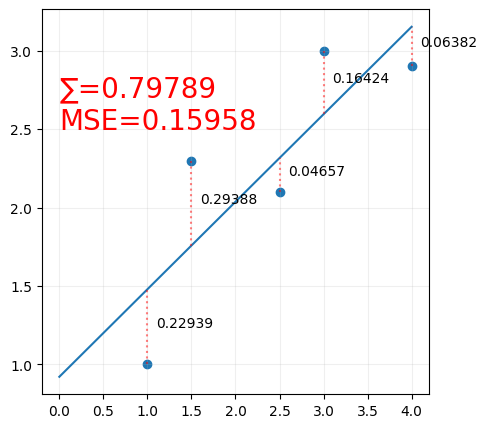

In [269]:
import matplotlib.pyplot as plt

# plot the data points
f, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['x'], df['y'])

# plot the regression line
x = np.linspace(0, 4, 5)
y = model.predict(x.reshape(-1,1))
ax.plot(x,y, label=f'y= {model.intercept_} + {model.coef_[0]}x')

# calculate the predictions and residuals
y_hat = model.predict(df[['x']]) # y_hat = model.coef_[0]*df['x'] + model.intercept_
residuals = (y_hat - df['y'])**2
SE = np.sum(residuals)
MSE = np.mean(residuals)

# update the dataframe with an additional column for the predictions
df['y_hat'] = y_hat
display(df)

# loop over the data points in the df
for i, row in df.iterrows():
    ax.plot([row['x'], row['x']], [row['y'], row['y_hat']], color='red', linestyle='dotted', alpha=0.5)
    y_midpoint = (row['y'] + row['y_hat'])/2
    ax.text(row['x']+0.1, y_midpoint, f'{residuals[i]:.5f}')

ax.text(0, 2.5, f'∑={SE:.5f}\nMSE={MSE:.5f}', fontsize=20, color='red')

ax.grid(alpha=0.2)
plt.show()

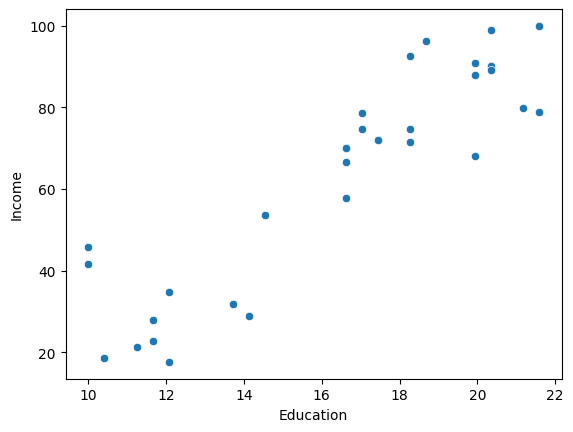

In [270]:
sns.scatterplot(x='Education', y='Income', data=income_df)
plt.show()

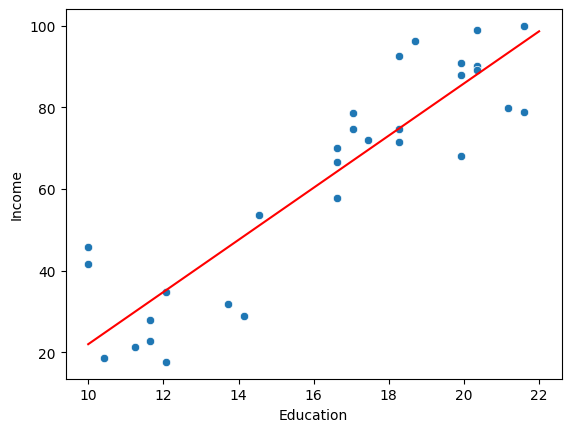

In [271]:
from sklearn.linear_model import LinearRegression

# create and train the model
income_model = LinearRegression()
income_model.fit(income_df[['Education']], income_df['Income'])

# plot the data points
sns.scatterplot(x='Education', y='Income', data=income_df)

# plot the regression line
x = np.linspace(10, 22, 5)
y = income_model.coef_[0]*x + income_model.intercept_

plt.plot(x,y, label=f'y= {income_model.intercept_} + {income_model.coef_[0]}x', color='red')

plt.show()

### Multiple Linear Regression
ok let's try multiple linear regression, more than one feature.

In [272]:
from sklearn.linear_model import LinearRegression

income_model = LinearRegression()
income_model.fit(income_df[['Education', 'Seniority']], income_df['Income'])

income_model.coef_, income_model.intercept_

(array([5.89555596, 0.17285547]), -50.08563875473381)

note how the coefficients have multiple values.

In [273]:
## Prepare the data for Visualization
import numpy as np

x_surf, y_surf = np.meshgrid(
  np.linspace(income_df.Education.min(), income_df.Education.max(), 100),
  np.linspace(income_df.Seniority.min(), income_df.Seniority.max(), 100)
)
surfaceX = pd.DataFrame({'Education': x_surf.ravel(), 'Seniority': y_surf.ravel()})
predictedIncomeForSurface=income_model.predict(surfaceX)

## convert the predicted result in an array
predictedIncomeForSurface=np.array(predictedIncomeForSurface)
predictedIncomeForSurface

array([ 12.32703024,  13.01700126,  13.70697228, ..., 108.22241178,
       108.9123828 , 109.60235383])

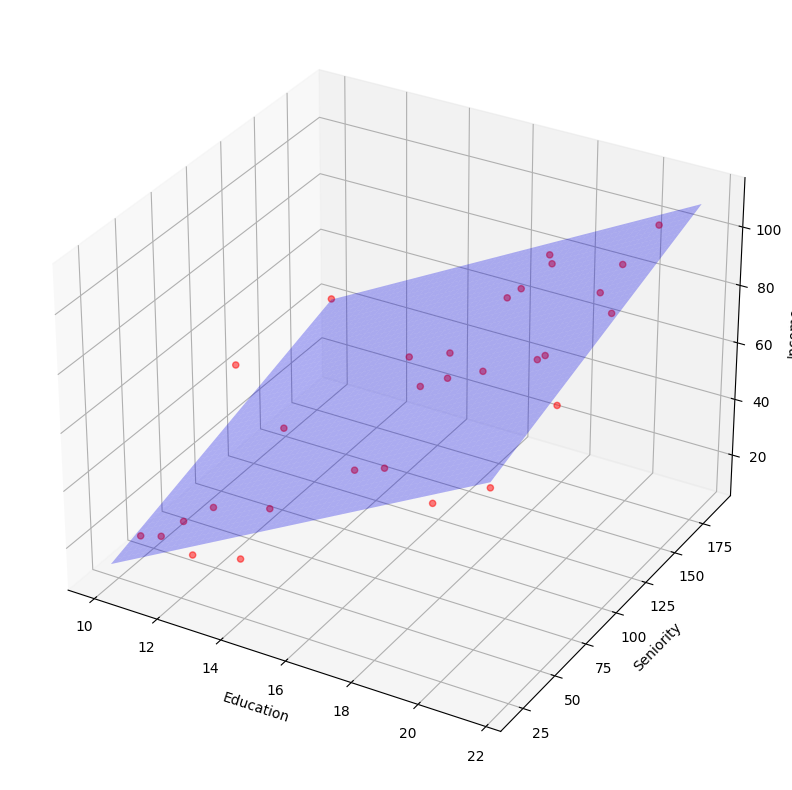

In [274]:
# Visualize the Data for Multiple Linear Regression
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(20,10))
### Set figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(income_df['Education'],income_df['Seniority'],income_df['Income'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, predictedIncomeForSurface.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('Education')
ax.set_ylabel('Seniority')
ax.set_zlabel('Income')
plt.show()

and it doesn't matter how many additional features you add to the model, this would still hold. As long as the model we're predicting can fit this model. 
Once we're past the 3d, we don't really know if the linear model is approproate for the data, since we can't visualize it. 

so as a machine learning professional, you'd be trying different models and algorithms, evaluating them, and then choosing the best one.

We will take next week about how we can evaluate our model, when we can't visualize it.

### Polynomial Regression
polynomial regression is a special case of multiple linear regression, where we're using polynomial features instead of linear features.

For a single feature $x$, we can create polynomial features up to degree $n$ as:

$$x_{0} = 1$$
$$x_{1} = x$$
$$x_{2} = x^{2}$$
$$x_{3} = x^{3}$$
$$...$$
$$x_{n} = x^{n}$$

Let's visualize that.

As the model polynomial degree increases, the model complexity increases, and the model becomes more flexible. and that's why we can fit more complex data with polynomial regression.

:::warn 
you want to be careful, because if you use a polynomial model with a high degree, you can overfit the data.
:::



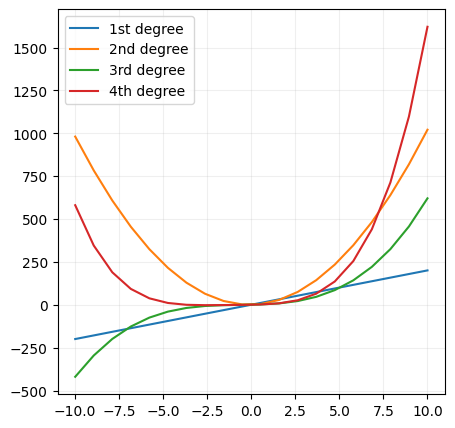

In [276]:
x = np.linspace(-10, 10, 20)
first_degreee_y = 20*x + 1
second_degree_y = 10*x**2 + 2*x + 1
third_degree_y = 0.5*x**3 + x**2 + 2*x + 1
fourth_degree_y = 0.1*x**4 + 0.5*x**3 + x**2 + 2*x + 1
# visualize the data with different polynomial degrees
f, ax = plt.subplots(figsize=(5,5))
ax.plot(x,first_degreee_y, label='1st degree')
ax.plot(x,second_degree_y, label='2nd degree')
ax.plot(x,third_degree_y, label='3rd degree')
ax.plot(x,fourth_degree_y, label='4th degree')
ax.legend()
ax.grid(alpha=0.2)
plt.show()


Now mathematically, polynomial regression is the same as multiple linear regression, except that we're using polynomial features instead of linear features.

this was linear regression:
$$\hat{y} = h(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2}$$

this is polynomial regression of the third degree for a single feature:
$$\hat{y} = h(x) =$$
$$\;\theta_{0} + $$
$$\;\theta_{1_{x1}}x_{1} + \theta_{2_{x1}}x_{1}^{2} + \theta_{3_{x1}}x_{1}^{3} +$$
$$\;\theta_{1_{x2}}x_{2} + \theta_{2_{x2}}x_{2}^{2} + \theta_{3_{x2}}x_{2}^{3} + ... $$

For every feature x, you get multiple terms with different degrees. and you can see that the model is getting more complex as the degree increases.

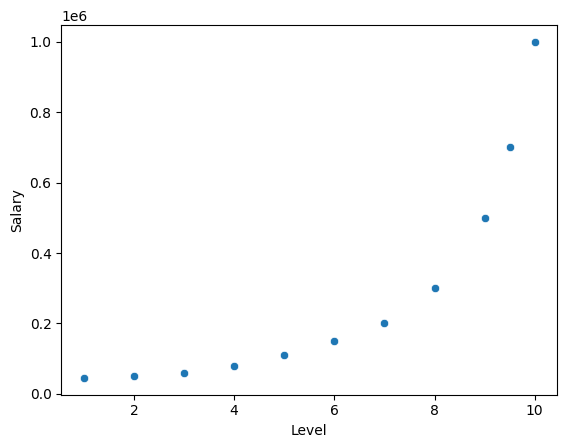

In [277]:
income2_df = pd.read_csv('data/position_salaries.csv')

sns.scatterplot(x='Level', y='Salary', data=income2_df)

plt.show()

If I was to fit it using linear regression, I would get a straight line, and if I was to fit it using polynomial regression, I would get a curved line.

In [278]:
income2_model = LinearRegression()
income2_model.fit(income2_df[['Level']], income2_df['Salary'])


LinearRegression()

/Users/gilanyym/.local/share/virtualenvs/IT4063C.github.io-cdKt1PoY/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/Users/gilanyym/.local/share/virtualenvs/IT4063C.github.io-cdKt1PoY/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Level
Feature names seen at fit time, yet now missing:
- x




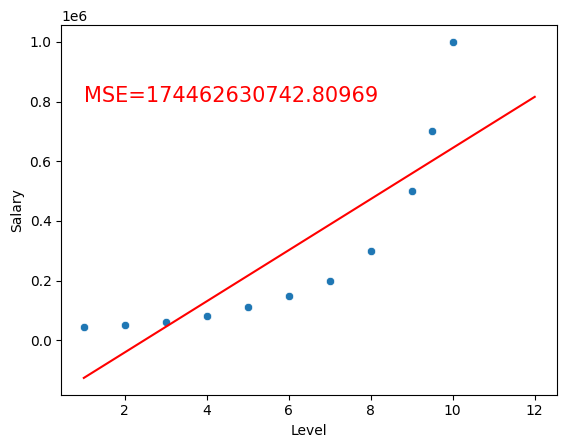

In [279]:
sns.scatterplot(x='Level', y='Salary', data=income2_df)
x2 = np.linspace(1, 12, 20)
y2 = income2_model.predict(x2.reshape(-1,1))

y_hat = model.predict(income2_df[['Level']])

residuals = (y_hat - income2_df['Salary'])**2
MSE = np.mean(residuals)

plt.text(1, 800000, f'MSE={MSE:.5f}', fontsize=15, color='red')

plt.plot(x2,y2, label=f'y= {income2_model.intercept_} + {income2_model.coef_[0]}x', color='red')

plt.show()

But if we use Polynomial Features, we transform the data to a higher dimension, and we can fit a linear model to it.

For example using a second degree polynomial:

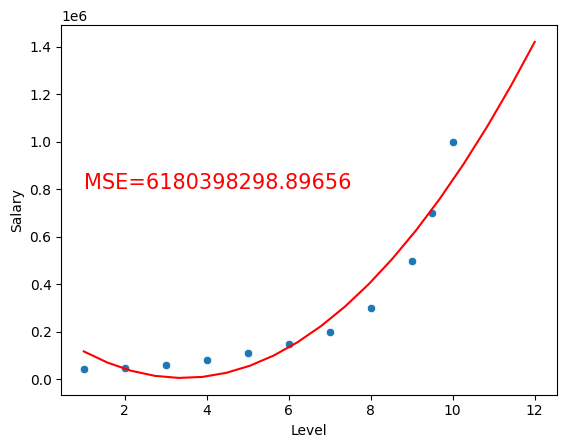

In [280]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_X= poly.fit_transform(income2_df[['Level']])

polynomial_income2_model = LinearRegression()
polynomial_income2_model.fit(poly_X, income2_df['Salary'])

sns.scatterplot(x='Level', y='Salary', data=income2_df)

x3 = np.linspace(1, 12, 20)
y3 = polynomial_income2_model.predict(poly.fit_transform(x3.reshape(-1,1)))
y_hat = polynomial_income2_model.predict(poly.fit_transform(income2_df[['Level']]))

residuals = (y_hat - income2_df['Salary'])**2
MSE = np.mean(residuals)

plt.text(1, 800000, f'MSE={MSE:.5f}', fontsize=15, color='red')

plt.plot(x3,y3, color='red')

plt.show()

using a third degree polynomial:

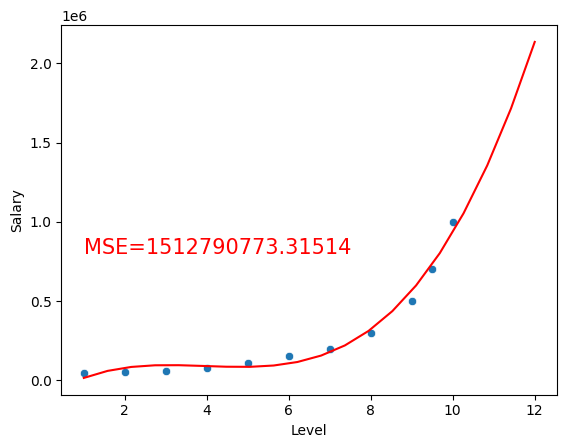

In [281]:
from sklearn.preprocessing import PolynomialFeatures

poly3 = PolynomialFeatures(degree=3)
poly3_X= poly3.fit_transform(income2_df[['Level']])

polynomial3_income2_model = LinearRegression()
polynomial3_income2_model.fit(poly3_X, income2_df['Salary'])

sns.scatterplot(x='Level', y='Salary', data=income2_df)

x4 = np.linspace(1, 12, 20)
y4 = polynomial3_income2_model.predict(poly3.fit_transform(x4.reshape(-1,1)))
y_hat = polynomial3_income2_model.predict(poly3.fit_transform(income2_df[['Level']]))

residuals = (y_hat - income2_df['Salary'])**2
MSE = np.mean(residuals)

plt.text(1, 800000, f'MSE={MSE:.5f}', fontsize=15, color='red')

plt.plot(x4,y4, color='red')

plt.show()

### Multiple Polynomial Regression

Here I'm using the pipeline to transform the data, and then fit the model.

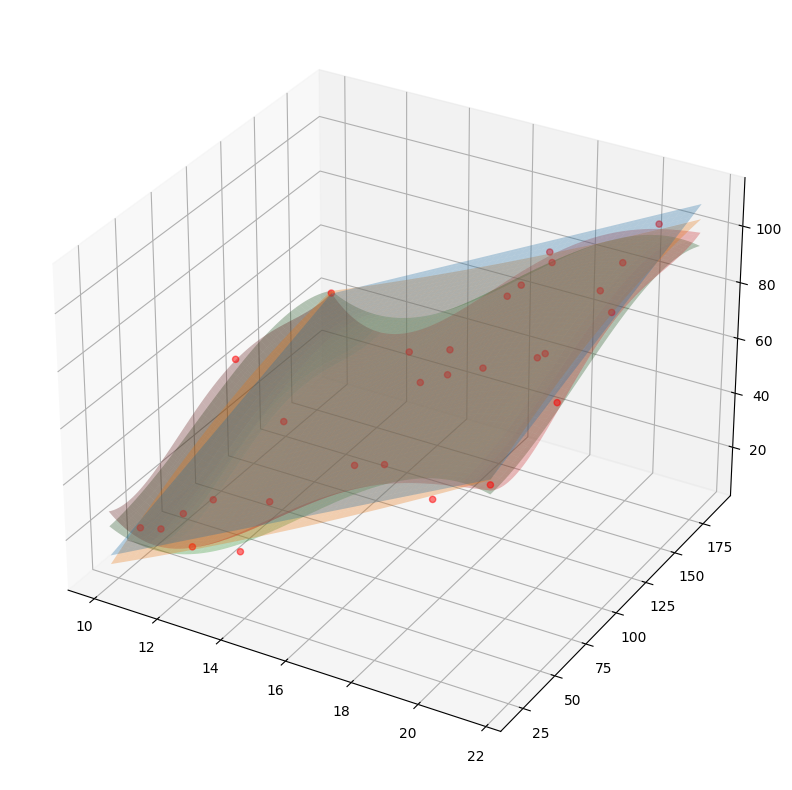

In [282]:
# Visualize the same data using different polynomial degrees
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

fig = plt.figure(figsize=(20,10))
### Set figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(income_df['Education'],income_df['Seniority'],income_df['Income'],c='red', marker='o', alpha=0.5)

for degree in [1,2,3,4]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(income_df[['Education', 'Seniority']], income_df['Income'])
    predictedIncomeForSurface=model.predict(surfaceX)
    ax.plot_surface(x_surf, y_surf, predictedIncomeForSurface.reshape(x_surf.shape), alpha=0.3)